In [1]:
import pandas as pd
import numpy as np
import os
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.set(font='SimHei')

In [3]:
# Load data
df_train = pd.read_csv('../dataset/600031.csv')
df_train.set_index('日期',inplace=True)
# Show first lines of data
df_train.head()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,
2020-11-09,27.80,27.54,28.14,26.89,856249,2348800992,4.55,0.18,0.05,1.01
2020-11-10,27.98,27.32,27.98,26.91,558824,1523209504,3.89,-0.80,-0.22,0.66
2020-11-11,27.33,28.31,28.86,27.21,1015374,2873205488,6.04,3.62,0.99,1.20
2020-11-12,28.31,28.70,28.88,27.91,718595,2041558432,3.43,1.38,0.39,0.85
2020-11-13,28.28,28.16,28.50,27.60,674807,1888773520,3.14,-1.88,-0.54,0.80


### 查看冗余，缺失信息

In [4]:
# Function to check the missing percent of a DatFrame;
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [5]:
check_missing_data(df_train)

,Total,Percent
开盘,0,0.0
收盘,0,0.0
最高,0,0.0
最低,0,0.0
成交量,0,0.0
成交额,0,0.0
振幅,0,0.0
涨跌幅,0,0.0
涨跌额,0,0.0
换手率,0,0.0


In [6]:
# 当某两列的相关系数非常高（接近1.0）的时候，我们认为这两列的信息是冗余的。
df_train.corr()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
开盘,1.000000,0.987127,0.994168,0.995600,-0.062605,0.309691,0.466374,-0.025143,-0.041680,-0.062120
收盘,0.987127,1.000000,0.995569,0.994422,-0.053926,0.316265,0.500237,0.121713,0.107988,-0.053420
最高,0.994168,0.995569,1.000000,0.995075,-0.028074,0.345375,0.527361,0.059532,0.042311,-0.027562
最低,0.995600,0.994422,0.995075,1.000000,-0.085634,0.286161,0.443406,0.039373,0.026148,-0.085168
成交量,-0.062605,-0.053926,-0.028074,-0.085634,1.000000,0.921587,0.530023,0.104503,0.061271,0.999993
成交额,0.309691,0.316265,0.345375,0.286161,0.921587,1.000000,0.704641,0.109323,0.061693,0.921802
振幅,0.466374,0.500237,0.527361,0.443406,0.530023,0.704641,1.000000,0.289007,0.235551,0.530612
涨跌幅,-0.025143,0.121713,0.059532,0.039373,0.104503,0.109323,0.289007,1.000000,0.979940,0.104511
涨跌额,-0.041680,0.107988,0.042311,0.026148,0.061271,0.061693,0.235551,0.979940,1.000000,0.061297
换手率,-0.062120,-0.053420,-0.027562,-0.085168,0.999993,0.921802,0.530612,0.104511,0.061297,1.000000


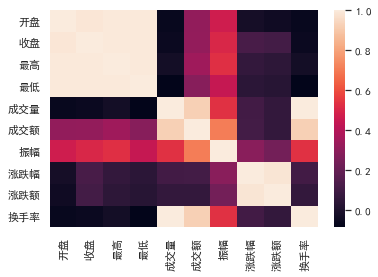

In [7]:
sns.heatmap(df_train.corr())
plt.show()

In [8]:
df_train.drop(['开盘','最高','最低','涨跌额','成交额'],axis=1,inplace=True)

In [9]:
df_train.head()

,收盘,成交量,振幅,涨跌幅,换手率
日期,,,,,
2020-11-09,27.54,856249,4.55,0.18,1.01
2020-11-10,27.32,558824,3.89,-0.80,0.66
2020-11-11,28.31,1015374,6.04,3.62,1.20
2020-11-12,28.70,718595,3.43,1.38,0.85
2020-11-13,28.16,674807,3.14,-1.88,0.80


### 查看各列分布情况：

<AxesSubplot:title={'center':"Histogram of '查看各列分布情况'"}, xlabel='换手率', ylabel='Density'>

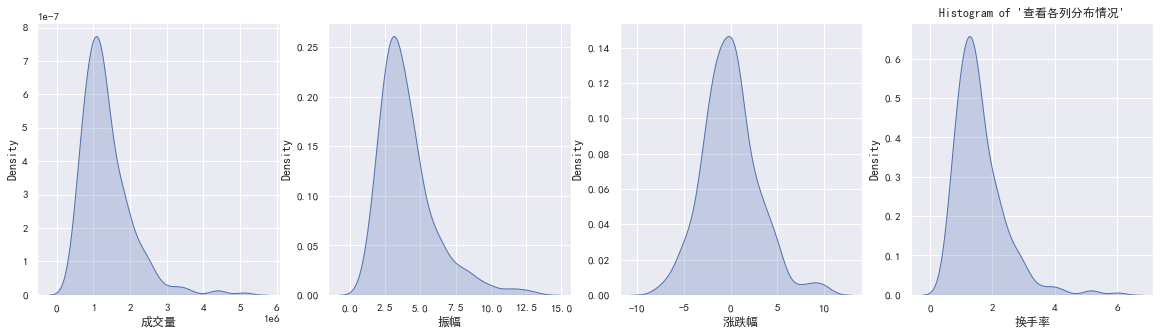

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))

plt.title("Histogram of '查看各列分布情况'")
sns.kdeplot(data=df_train['成交量'], shade=True, ax=ax1)

sns.kdeplot(data=df_train['振幅'], shade=True, ax=ax2)

sns.kdeplot(data=df_train['涨跌幅'], shade=True, ax=ax3)

sns.kdeplot(data=df_train['换手率'], shade=True, ax=ax4)

### 查看两两列之间的关系：

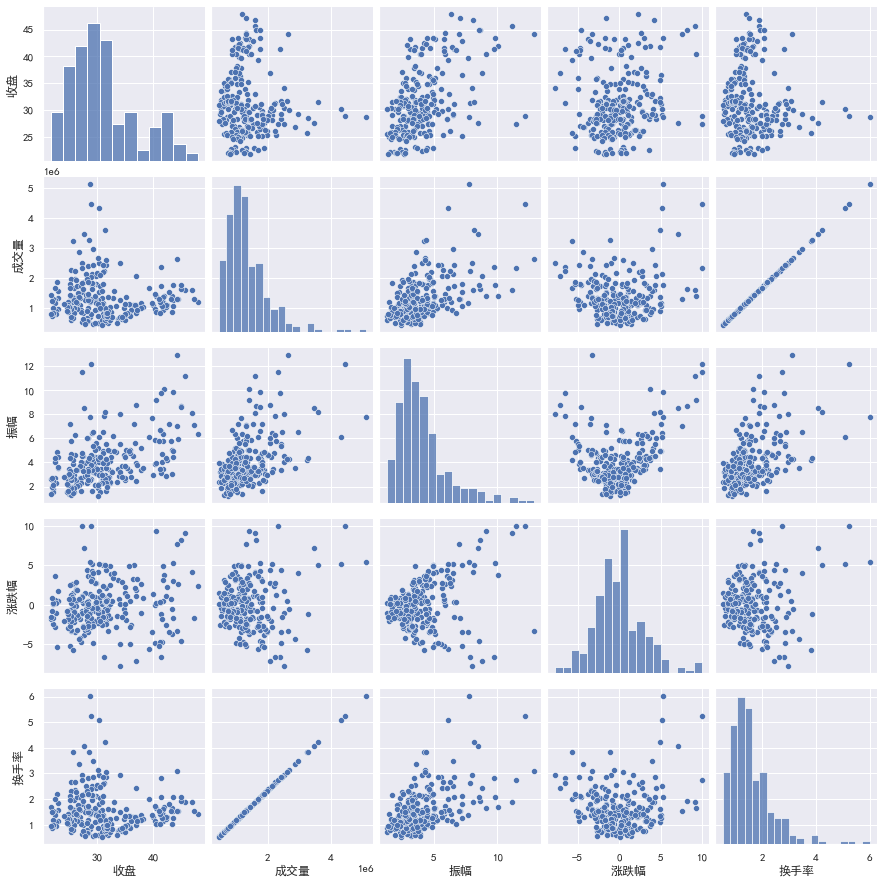

In [11]:
sns.pairplot(data=df_train)
plt.show()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11152/1114429292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['成交量'] = df['成交量'].map(lambda x: float(x/1000000))


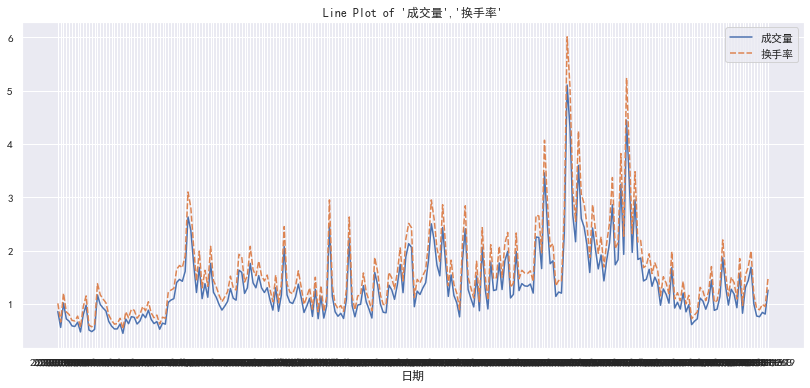

In [12]:
plt.figure(figsize=(14,6))

plt.title("Line Plot of '成交量','换手率'")
df = df_train[['成交量','换手率']]
df['成交量'] = df['成交量'].map(lambda x: float(x/1000000))  
graph = sns.lineplot(data=df)

In [13]:
df_train.head()

,收盘,成交量,振幅,涨跌幅,换手率
日期,,,,,
2020-11-09,27.54,856249,4.55,0.18,1.01
2020-11-10,27.32,558824,3.89,-0.80,0.66
2020-11-11,28.31,1015374,6.04,3.62,1.20
2020-11-12,28.70,718595,3.43,1.38,0.85
2020-11-13,28.16,674807,3.14,-1.88,0.80


In [14]:
datalist = list()
for i in range(0, len(df_train)):
    if df_train.iloc[i, list(df_train.columns).index('涨跌幅')] > 0:
        datalist.append(1)
    else:
        datalist.append(0)
df_train['涨跌'] = datalist

In [15]:
df_train.head()

,收盘,成交量,振幅,涨跌幅,换手率,涨跌
日期,,,,,,
2020-11-09,27.54,856249,4.55,0.18,1.01,1
2020-11-10,27.32,558824,3.89,-0.80,0.66,0
2020-11-11,28.31,1015374,6.04,3.62,1.20,1
2020-11-12,28.70,718595,3.43,1.38,0.85,1
2020-11-13,28.16,674807,3.14,-1.88,0.80,0


In [16]:
# 特征值处理
# 特征离散化
def fun(x):
    if 0<=abs(x)<2:
        return 1
    elif 2<=abs(x)<4:
        return 2
    elif 4<=abs(x)<6:
        return 3
    elif 6<=abs(x)<8:
        return 4
    else:
        return 5
    
df_train['振幅'] = df_train['振幅'].map(fun)  
df_train['换手率'] = df_train['换手率'].map(fun)  
df_train['涨跌幅'] = df_train['涨跌幅'].map(fun)  

In [17]:
df_train.head()

,收盘,成交量,振幅,涨跌幅,换手率,涨跌
日期,,,,,,
2020-11-09,27.54,856249,3,1,1,1
2020-11-10,27.32,558824,2,1,1,0
2020-11-11,28.31,1015374,4,2,1,1
2020-11-12,28.70,718595,2,1,1,1
2020-11-13,28.16,674807,2,1,1,0


In [18]:
def mean_handle(total_list, cycle):
            return [np.mean(total_list[i:i + cycle]) for i in range(len(total_list))]

In [19]:
cycle = 15

In [20]:
for column in ['收盘','成交量']:
            df_train[column] = mean_handle(df_train[column].tolist(), cycle)

### 归一化

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_train)

MinMaxScaler(feature_range=(-1, 1))

In [23]:
df_train = scaler.transform(df_train)

In [24]:
df_train = pd.DataFrame(df_train)

In [25]:
df_train.columns = ['收盘','成交量','振幅','涨跌幅','换手率','涨跌']
df_train.head()

,收盘,成交量,振幅,涨跌幅,换手率,涨跌
0,-0.378344,-0.956297,0.0,-1.0,-1.0,1.0
1,-0.359395,-0.947059,-0.5,-1.0,-1.0,-1.0
2,-0.330046,-0.921579,0.5,-0.5,-1.0,1.0
3,-0.305658,-0.932011,-0.5,-1.0,-1.0,1.0
4,-0.287964,-0.935367,-0.5,-1.0,-1.0,-1.0
